In [91]:
library(pivottabler)
library(IRdisplay)
mfc.df <- read.csv('./mfc-20220522-20230522.csv')
mfc.df$Email <- tolower(mfc.df$Email)

In [92]:
pt <- PivotTable$new()
pt$addData(subset(mfc.df, Type == 'Training session'))
pt$addRowDataGroups("Email", totalCaption="All")
pt$defineCalculation(calculationName="N", caption="N.", 
                     format=list(digits=1, nsmall=1, big.mark='.', decimal.mark=','),
                     summariseExpression="length(Last.Name)")
pt$defineCalculation(calculationName="R", caption="N/mo", 
                     type="calculation", basedOn=c("N"), 
                     format="%.1f",
                     calculationExpression="(values$N / 11)")
pt$evaluatePivot()
pt$renderPivot()


HTML widgets cannot be represented in plain text (need html)

[1] 44

[1] 671

[1] "Total members: 96 (100.00%)"
[1] "Members with 1 session: 31 (32.29%)"
[1] "Members with less than 5 sessions: 60 (62.50%)"
[1] "Members with less than 12 sessions: 77 (80.21%)"


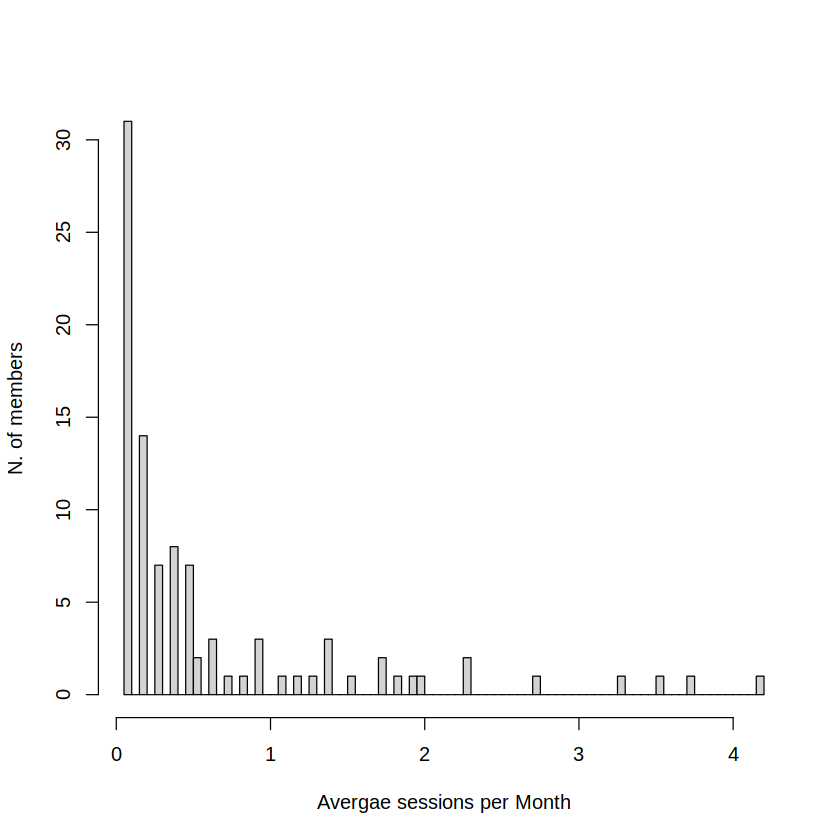

In [96]:
m <- pt$asDataMatrix()
r <- m[1:(nrow(m) -1),2]
n <- m[1:(nrow(m) -1),1]

hist(r, 100, main='', xlab='Avergae sessions per Month', ylab='N. of members')

percent <- function(x, digits = 2, format = "f", ...) {      # Create user-defined function
  paste0(formatC(x * 100, format = format, digits = digits, ...), "%")
}

f <- function(x, s, c) {
    l <- length(subset(x, n<c))
    print(paste(s, ': ', l, ' (', percent(l / length(x)), ')', sep=''))
}

nrow(subset(mfc.df, Type == 'Safety Induction'))
nrow(subset(mfc.df, Type == 'Training session'))

f(n, 'Total members', 100)
f(n, 'Members with 1 session', 2)
f(n, 'Members with less than 5 sessions', 5)
f(n, 'Members with less than 12 sessions', 12)
